In [1]:
import pandas as pd 
import  numpy as np 

In [2]:
df = pd.read_csv('farmer.csv')
df.head( )

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
x = df.drop('label',axis=1)

In [5]:
x 

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [9]:
len(df['label'].value_counts())

22

In [6]:
import sklearn

In [7]:
from sklearn.cluster import KMeans 

In [10]:
km = KMeans(n_clusters=10)

In [12]:
from sklearn.metrics import silhouette_score

In [11]:
km.fit(x)

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [13]:
km.labels_

array([7, 3, 3, ..., 7, 2, 7])

In [14]:
km.inertia_

2130957.9573720414

In [19]:
km.predict([x.loc[0].values] )

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([7])

In [23]:
wcss = []
for i in range(1,31):
    
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

In [24]:
import matplotlib.pyplot as plt 

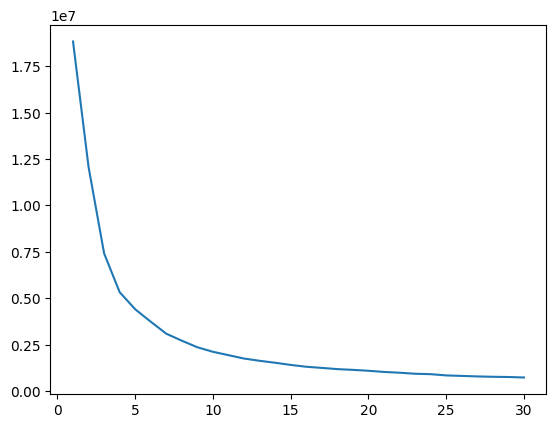

In [26]:
plt.plot(list(range(1,31)),wcss)
plt.x
plt.show()

In [28]:
km = KMeans(n_clusters=8)

In [29]:
km.fit(x)

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [30]:
km.labels_

array([1, 1, 1, ..., 1, 5, 5])

In [31]:
km.inertia_

2727900.3686132487

In [32]:
from sklearn.preprocessing import StandardScaler 

In [33]:
x_transformed = StandardScaler().fit_transform(x)

In [37]:
import warnings 
warnings.filterwarnings('ignore')

In [38]:
wcss = []
for i in range(1,51):
    
    km = KMeans(n_clusters=i)
    km.fit(x_transformed)
    wcss.append(km.inertia_)

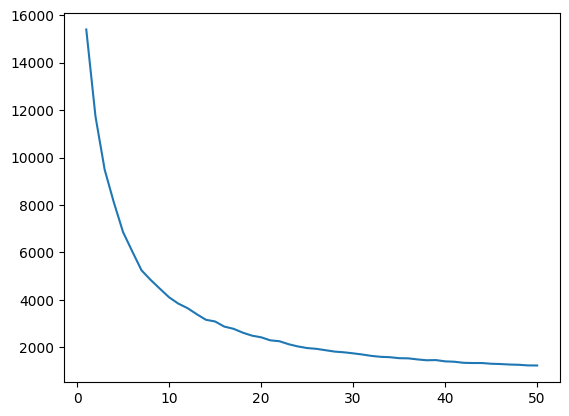

In [40]:
plt.plot(list(range(1,51)),wcss)
plt.show()

In [42]:
silhouette_score(x,km.labels_)

0.11871042066410398